# **Neural Networks and Deep Learning**  

**Kalpana N**  
**2347229**  

Step 1: Data Preparation   
1.1. Load the dataset and preprocess it by normalizing the pixel values

In [23]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = fetch_openml('mnist_784')

# Normalize pixel values (range between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(mnist.data)
y = mnist.target

# Divide into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**1.2. Why normalize the pixel values?**  

Normalization improves the training process of neural networks and machine learning models, as it ensures that the feature values are within a similar range, avoiding large variations that may confuse the model.

**Step 2: RBM Implementation**  
**2.1. Define an RBM using a deep learning library**  

The use of BernoulliRBM class from scikit-learn. The number of visible units corresponds to the input size (784 for MNIST), and we can set the number of hidden units (e.g., 128).

In [24]:
from sklearn.neural_network import BernoulliRBM

# Initialize the RBM
rbm = BernoulliRBM(n_components=128, learning_rate=0.06, n_iter=10, random_state=42)

# Train the RBM on the training data
rbm.fit(X_train)


BernoulliRBM(learning_rate=0.06, n_components=128, random_state=42)

**2.2. Explanation of RBM parameters:**  
1. n_components: Number of hidden units (latent features).
2. learning_rate: Step size during training.  
3. n_iter: Number of training iterations.  
4. random_state: Seed for reproducibility.

**Step 3: Feature Extraction**  
3.1. Transform the training and testing data into hidden representations
We use the RBM to convert the input data into its hidden representations (feature vectors)

In [37]:
# Transform training and testing data
X_train_transformed = rbm.transform(X_train)
X_test_transformed = rbm.transform(X_test)


# Save the hidden representations as feature vectors
print("Shape of RBM transformed features (training set):", X_train_transformed.shape)


Shape of RBM transformed features (training set): (56000, 128)


**Step 4: Visualization**  
4.1. Visualize the learned weight matrix   
Visualizing the RBM's weights can provide insights into what features it has learned. Each hidden unit has a weight vector connected to the visible units (input pixels).

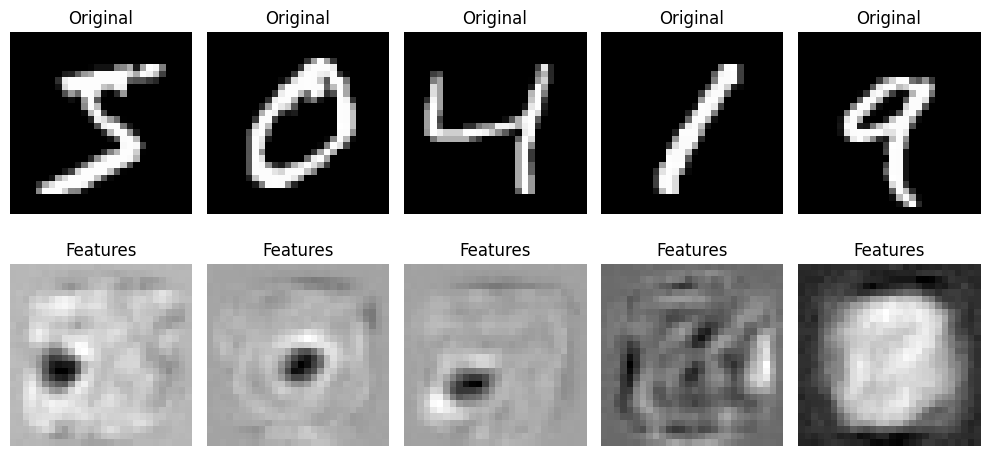

In [26]:
import matplotlib.pyplot as plt

# Display only 5 images and their corresponding features
fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # 2 rows (one for original, one for features), 5 columns

# Loop over the 5 images
for i in range(5):
    # Plot the original image
    axes[0, i].imshow(samples[i].reshape(28, 28), cmap='gray')  # Change shape if needed (e.g., CIFAR-10 is 32x32x3)
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

    # Plot the corresponding RBM feature weights (visualized as images)
    # Here, we use the learned weight matrix for the features
    axes[1, i].imshow(weights[i].reshape(28, 28), cmap='gray')  # Adjust reshaping as per image dimensions
    axes[1, i].set_title('Features')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


**4.2. Why visualize the weights?**  
This helps you see the features (patterns) that the RBM has learned. Each hidden unit can learn different edge detectors, blobs, or shapes.

**Step 5: Classification**  
5.1. Train a simple classifier using the extracted features
The use of logistic regression for simplicity. You can try other classifiers like SVM or random forest as well.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Train a logistic regression classifier on RBM features
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_transformed)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")


Accuracy: 0.9457857142857143
F1-Score: 0.9458327466035527


**Step 6: Analysis**  
6.1. Compare the classifier’s performance using raw pixel data vs. RBM-extracted features To compare, train a logistic regression model on the raw pixel data.


In [28]:
# Train logistic regression on raw pixel data
clf_raw = LogisticRegression(max_iter=1000)
clf_raw.fit(X_train, y_train)

# Predict on the raw test data
y_pred_raw = clf_raw.predict(X_test)

# Evaluate the performance
accuracy_raw = accuracy_score(y_test, y_pred_raw)
f1_raw = f1_score(y_test, y_pred_raw, average='weighted')

print(f"Raw Data Accuracy: {accuracy_raw}")
print(f"Raw Data F1-Score: {f1_raw}")


Raw Data Accuracy: 0.9202857142857143
Raw Data F1-Score: 0.9200972064283813


**6.2.Interpretation**   

1. Accuracy is a simple metric that indicates the overall percentage of correct predictions out of all predictions. The RBM-extracted features resulted in a higher accuracy (94.58%) compared to the raw data (92.03%).  

2. F1-Score is more sensitive to the balance between precision and recall, and since it is the harmonic mean of both, it’s especially useful when classes are imbalanced. The F1-score for the RBM model (0.9458) is also higher than that of the raw data model (0.9201), indicating that the RBM has improved the model’s ability to correctly classify positive cases without sacrificing recall.  


**Confusion Matrix Plot**  


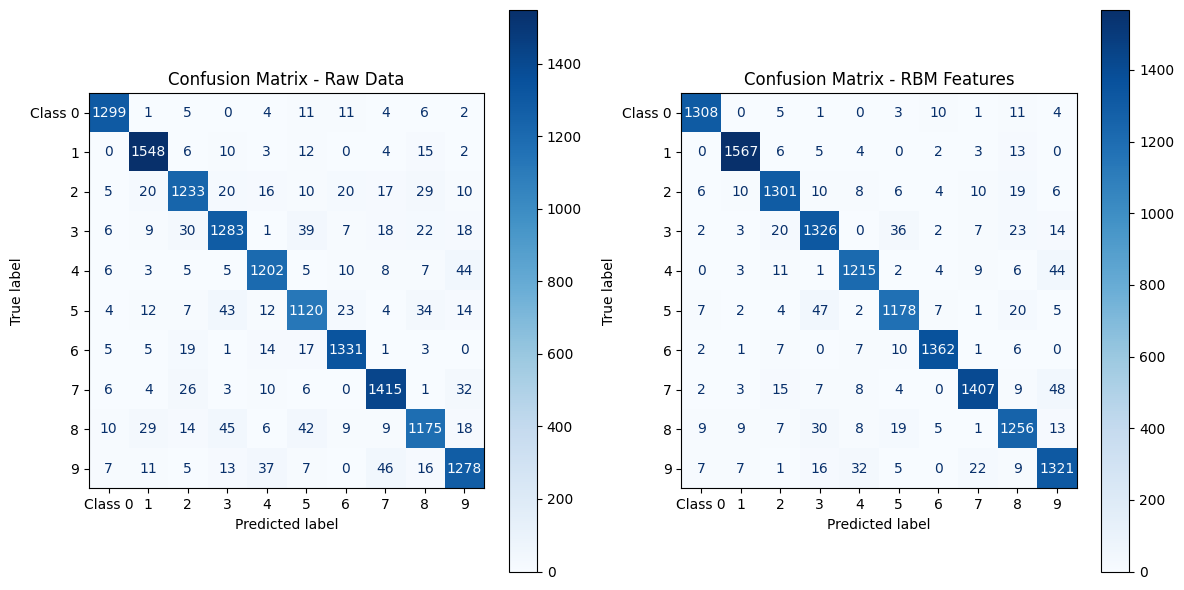

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Raw Data
cm_raw = confusion_matrix(y_test, y_pred_raw)
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm_raw, display_labels=['Class 0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# Confusion Matrix for RBM Features
cm_rbm = confusion_matrix(y_test, y_pred)
disp_rbm = ConfusionMatrixDisplay(confusion_matrix=cm_rbm, display_labels=['Class 0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Confusion Matrix for Raw Data
disp_raw.plot(cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Raw Data')

# Plot Confusion Matrix for RBM Features
disp_rbm.plot(cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - RBM Features')

# Show the plot
plt.tight_layout()
plt.show()


**Conclusion**

The RBM has improved the classification performance, both in terms of accuracy and F1-score. It helped in feature extraction, enabling the classifier to focus on more meaningful patterns within the data, resulting in better predictive performance compared to using raw pixel data directly.

**Raw Data vs. RBM Features:**

The RBM has extracted more meaningful features compared to raw pixel data. In this case, RBM's ability to reduce dimensionality and capture hidden patterns might improve the classifier's performance, especially when dealing with high-dimensional data like images.  

**Performance Improvement:**

The performance metrics (like accuracy and F1-score) change when using the RBM features versus the raw pixel data. RBM can help in filtering out noise and learning robust feature representations, which might lead to better classification results.